# **Proyecto 3: Filtros**

### Andres Banquez- Melina Villada

## **Objetivos:**

Implementar un flujo de procesamiento que incluya filtrado de las se√±ales y extracci√≥n de caracter√≠sticas espectrales


1. Del art√≠culo:
https://www.nature.com/articles/s41598-020-59821-7

Consultar y explicar los dos m√©todos de reducci√≥n de ruido usados en el art√≠culo: Robust LOESS y Non Local Means (10%), mostrar c√≥mo se podr√≠an implementar en Python (5%)

**Robust LOESS (Locally Estimated Scatterplot Smoothing)**: Este m√©todo elimina el ruido de baja frecuencia, como el "baseline wandering", que ocurre debido a movimientos respiratorios o variaciones en la posici√≥n del electrodo. LOESS realiza un ajuste local ponderado de polinomios en cada punto de la se√±al, eliminando las fluctuaciones lentas en el nivel de la se√±al manteniendo las caracter√≠sticas de alta frecuencia.

El t√©rmino ‚Äúloess‚Äù es un acr√≥nimo de ‚Äúregresi√≥n local‚Äù y todo el procedimiento es una generalizaci√≥n bastante directa de los m√©todos tradicionales de m√≠nimos cuadrados para el an√°lisis de datos. El loess es no param√©trico en el sentido de que la t√©cnica de ajuste no requiere una especificaci√≥n a priori de la relaci√≥n entre las variables dependientes e independientes.[1]



In [2]:
import numpy as np
import scipy.signal as sis
from scipy.signal import butter, filtfilt, detrend
from statsmodels.nonparametric.smoothers_lowess import lowess
import matplotlib.pyplot as plt
from skimage.restoration import denoise_nl_means, estimate_sigma
import pywt
import pandas as pd
import os
import shutil


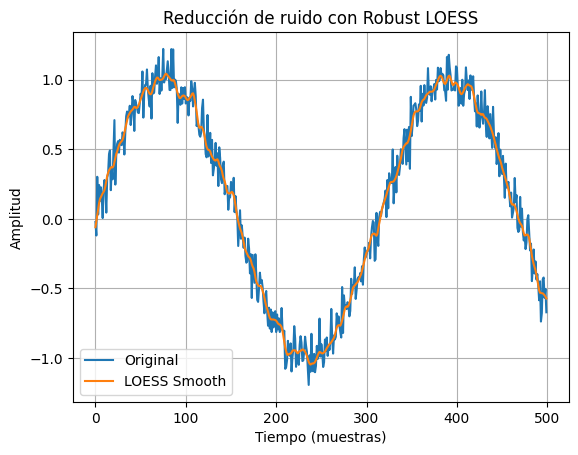

In [3]:
# Ejemplo con una se√±al ficticia de ECG
ecg_signal = np.sin(np.linspace(0, 10, 500)) + np.random.normal(0, 0.1, 500)
smoothed_signal = lowess(ecg_signal, np.arange(len(ecg_signal)), frac=0.02, is_sorted=True)

# Graficar se√±al original y suavizada

plt.plot(ecg_signal, label='Original')
plt.plot(smoothed_signal[:, 1], label='LOESS Smooth')
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Amplitud")
plt.title("Reducci√≥n de ruido con Robust LOESS")
plt.grid()
plt.legend()
plt.show()


**Non-Local Means (NLM):** Este m√©todo se utiliza principalmente para eliminar el ruido de alta frecuencia manteniendo estructuras repetitivas de la se√±al. Calcula el promedio ponderado de puntos similares dentro de una ventana para cada punto, basado en un par√°metro de similitud. Esto preserva detalles como picos caracter√≠sticos de la se√±al ECG.

El m√©todo no local (NLM) es un m√©todo reciente de eliminaci√≥n de ruido que ha recibido mucha atenci√≥n de la comunidad de procesamiento de se√±ales. Mientras que el filtrado lineal est√°ndar se basa en la correlaci√≥n espacial local, el principio no local explota el hecho de que pueden aparecer vecindarios similares en cualquier parte de la imagen ypueden contribuir a la eliminaci√≥n de ruido. [2]



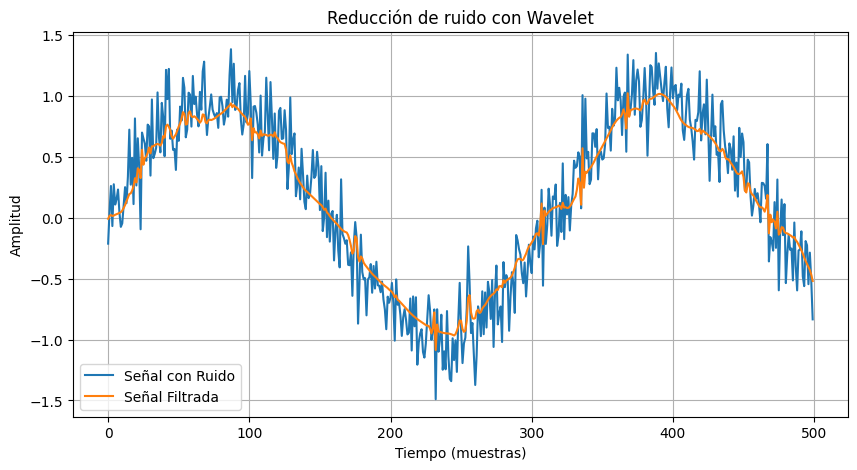

In [4]:


# Se√±al de ejemplo con ruido
noisy_ecg_signal = np.sin(np.linspace(0, 10, 500)) + np.random.normal(0, 0.2, 500)

# Descomposici√≥n en wavelets
coeffs = pywt.wavedec(noisy_ecg_signal, 'db4', level=4)

# Umbralizado de los coeficientes
threshold = np.std(noisy_ecg_signal) / 2
coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

# Reconstrucci√≥n de la se√±al filtrada
denoised_signal = pywt.waverec(coeffs, 'db4')

# Graficar se√±al original y denoised
plt.figure(figsize=(10, 5))
plt.plot(noisy_ecg_signal, label='Se√±al con Ruido')
plt.plot(denoised_signal, label='Se√±al Filtrada')
plt.xlabel("Tiempo (muestras)")
plt.ylabel("Amplitud")
plt.title("Reducci√≥n de ruido con Wavelet")
plt.legend()
plt.grid()
plt.show()







2. Descargar los datos ECGData.zip de:
https://figshare.com/collections/ChapmanECG/4560497/1

De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilaci√≥n auricular (AFIB Atrial Fibrillation). Esta informaci√≥n est√° en el archivo Diagnostics.xlsx

In [5]:
diagnostics_path = 'Diagnostics.xlsx'
diagnostics_df = pd.read_excel(diagnostics_path)
sbyafib_df=diagnostics_df[diagnostics_df['Rhythm'].isin(['AFIB', 'SB'])]
needed_files = sbyafib_df['FileName'].tolist()

In [6]:
data_folder = r"C:\Users\andre\OneDrive\Desktop\ECGData"
destination_folder = r"C:\Users\andre\OneDrive\Desktop\ECGFiltered"
os.makedirs(destination_folder, exist_ok=True)

for file_name in needed_files:
    source_path = os.path.join(data_folder, f"{file_name}.csv") 
    
    if os.path.exists(source_path):
        # Cargar el archivo CSV
        ecg_data = pd.read_csv(source_path)
        
        if 'II' in ecg_data.columns:
            derivacion_II = ecg_data['II']
            save_path = os.path.join(destination_folder, f"{file_name}_derivacion_II.csv")
            derivacion_II.to_csv(save_path, index=False)
            print(f"Derivaci√≥n II extra√≠da y guardada para: {file_name}.csv")
        else:
            print(f"Columna 'Derivacion_II' no encontrada en el archivo: {file_name}.csv")
    else:
        print(f"Archivo no encontrado: {file_name}.csv")

Derivaci√≥n II extra√≠da y guardada para: MUSE_20180113_171327_27000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180112_073319_29000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180113_121940_44000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180112_120347_79000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180114_075026_69000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180114_075128_92000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180118_174026_42000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180115_125443_25000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180113_134825_04000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180114_070718_20000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180115_133559_70000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180113_133901_16000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_20180113_071734_35000.csv
Derivaci√≥n II extra√≠da y guardada para: MUSE_2018

3. Consultar que otros tipos de se√±ales wavelet se pueden usar para el an√°lisis de se√±ales ECG y adaptar el c√≥digo del filtro wavelet que se entrega en el curso de acuerdo a la consulta (10%)

Para el an√°lisis de se√±ales ECG, se pueden emplear varias familias de wavelets adicionales, cada una con caracter√≠sticas espec√≠ficas que pueden mejorar la extracci√≥n de informaci√≥n en distintos aspectos de la se√±al. Algunas opciones incluyen:

Wavelet de Daubechies (db): Esta familia es popular para ECG por su suavidad y sus similitudes con las caracter√≠sticas de la se√±al, especialmente las versiones como db4, db6, y db8.

Wavelet de Symlet (sym): Ofrece mejor simetr√≠a y es adecuada para detectar transitorios y componentes de baja frecuencia en ECG. Ejemplos √∫tiles son sym4 y sym8.

Wavelet de Coiflet (coif): Ideal para captar detalles en se√±ales que tienen estructuras complejas en el dominio del tiempo-frecuencia, como coif3 y coif5.

Wavelet de Biorthogonal (bior): √ötil para an√°lisis multi-resoluci√≥n en ECG, ya que mantiene buena precisi√≥n en los bordes y puede capturar transiciones bruscas.

In [7]:

def filtro_wavelet_modificado(senal, wavelet_type='db6', nivel=8):
    '''
    Filtra la se√±al usando una descomposici√≥n wavelet y reconstrucci√≥n, permitiendo
    seleccionar diferentes tipos de wavelet (db6, sym3, coif3, meyer, etc.).

    Par√°metros:
    - senal: np.array, se√±al de entrada a filtrar.
    - wavelet_type: str, tipo de wavelet a utilizar (por defecto 'db6').
    - nivel: int, nivel de descomposici√≥n de la wavelet.

    Retorna:
    - Se√±al reconstruida despu√©s del filtrado wavelet.
    '''
    senal= senal.flatten()
    coeficientes = pywt.wavedec(senal, wavelet=wavelet_type, level=nivel)
    
    # Aplicar umbral a los coeficientes de detalle
    sigma = np.median(np.abs(coeficientes[-1])) / 0.6745
    umbral = sigma * np.sqrt(2 * np.log(len(senal)))
    coeficientes_filtrados = [pywt.threshold(c, umbral, mode='soft') for c in coeficientes]
    
    # Reconstruir la se√±al
    senal_filtrada = pywt.waverec(coeficientes_filtrados, wavelet=wavelet_type)
    return senal_filtrada


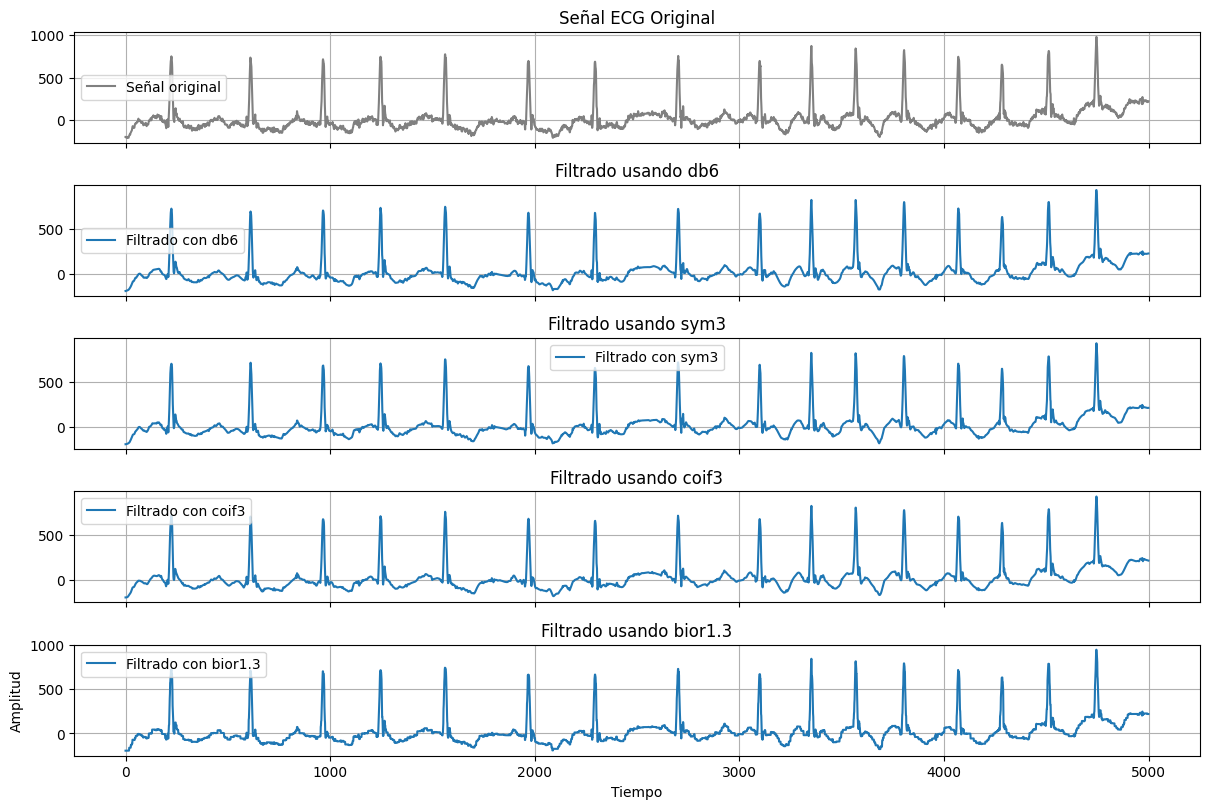

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar la se√±al ECG desde el archivo CSV
senal_ecg = r'Derivacion_II_Filtrados\MUSE_20180115_133327_45000_derivacion_II.csv'
data = pd.read_csv(senal_ecg)
data = np.array(data).flatten()

# Lista de wavelets a probar
wavelet_types = ['db6', 'sym3', 'coif3', 'bior1.3']

resultados = {}
for wavelet in wavelet_types:
    resultado_filtrado = filtro_wavelet_modificado(data, wavelet_type=wavelet)
    resultados[wavelet] = resultado_filtrado

# Crear una figura con subplots
n_wavelets = len(wavelet_types)
fig, axes = plt.subplots(n_wavelets + 1, 1, figsize=(12, 8), sharex=True)

# Graficar la se√±al original en el primer subplot
axes[0].plot(data, label='Se√±al original', color='gray')
axes[0].set_title('Se√±al ECG Original')
axes[0].legend()
axes[0].grid()


for ax, wavelet in zip(axes[1:], resultados.keys()):
    ax.plot(resultados[wavelet], label=f'Filtrado con {wavelet}')
    ax.set_title(f'Filtrado usando {wavelet}')
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.show()


4. Escoger 10 se√±ales al azar y aplicar un flujo de procesamiento que conste de:

Flujo 1

1. Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elecci√≥n de par√°metros y si se usa FIR o IIR
2. Filtro wavelet modificado del punto 3
3. Filtrado pasabajas 50 Hz. Justificar la elecci√≥n de par√°metros y si se usa FIR o IIR

Flujo 2

1. Detrend
2. Filtro wavelet modificado del punto 3
3. Filtrado pasabajas 50 Hz. Justificar la elecci√≥n de par√°metros y si se usa FIR o IIR

Flujo 3

1. Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elecci√≥n de par√°metros y si se usa FIR o IIR
2. Filtrado pasabajas 50 Hz. Justificar la elecci√≥n de par√°metros y si se usa FIR o IIR

Describir los resultados obtenidos y decidir si el resto del procesamiento se hace con el flujo 1, el flujo 2 o el flujo 3 (20%)

Con el flujo seleccionado procesar las se√±ales de la base de datos ECGData.zip derivaci√≥n II. En este punto deber√≠amos estar en el mismo punto donde partimos en el proyecto 2, con se√±ales filtradas.

A las se√±ales filtradas con el flujo seleccionado aplicar el procesamiento de normalizaci√≥n usado en el proyecto 2.

In [9]:
directory = r"C:\Users\andre\OneDrive\Desktop\ECGFiltered"

output_directory = r'Derivacion_II_Filtrados'
os.makedirs(output_directory, exist_ok=True)

existing_files = [f for f in os.listdir(output_directory) if f.endswith('.csv')]
if len(existing_files) >= 10:
    print("Ya existen 10 o m√°s archivos CSV en el directorio de destino. No se realizar√° una nueva selecci√≥n.")
else:
    # Obtener una lista de todos los archivos CSV en el directorio de entrada
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Seleccionar aleatoriamente 10 archivos CSV
    selected_files = np.random.choice(csv_files, 10, replace=False)

# Copiar los archivos seleccionados al directorio de destino
    for file in selected_files:
        source_path = os.path.join(directory, file)
        destination_path = os.path.join(output_directory, file)
        shutil.copy(source_path, destination_path)

    print("Se han seleccionado y copiado 10 archivos CSV aleatoriamente.")


Ya existen 10 o m√°s archivos CSV en el directorio de destino. No se realizar√° una nueva selecci√≥n.


Se eligen filtros FIR debido a que siempre son estables y pueden dise√±arse para tener una respuesta de fase lineal, lo que es crucial en aplicaciones donde se necesita preservar la forma de la se√±al, como en nuestro caso de ECG. Adem√°s, los FIR tienen un dise√±o m√°s sencillo y son menos susceptibles a problemas de precisi√≥n num√©rica, lo que los hace m√°s adecuados para implementaciones digitales. Aunque los FIR pueden requerir m√°s coeficientes y ser m√°s costosos en t√©rminos computacionales, su estabilidad garantizada y la capacidad de mantener una fase lineal a menudo los hacen preferibles en sistemas donde estos factores son cr√≠ticos.

Como se dijo antes requieren una MUY buena cantidad de coeficientes para realizar este trabajo, por tanto se decidi√≥ hacerlo con 500, para evitar colapsar la cantidad de coeficientes que se generar√≠an, con esto se obtiene entonces un Œîùêπ de:

Œîùêπ = 3,3/500 = 0.0066*500 = 3.3 Hz

In [10]:
#Filtro pasa-altas FIR
def filtro_pasa_altas(data, fs, cutoff=0.5, order=1650):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b,a = sis.firwin(order+1, normal_cutoff, pass_zero = 'highpass', window = 'hamming'),1
    return sis.filtfilt(b, a, data)


def filtro_pasa_bajas(data, fs, cutoff=50, order=1650):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b,a = sis.firwin(order+1, normal_cutoff, pass_zero = 'lowpass', window = 'hamming'),1
    return sis.filtfilt(b, a, data)

# Procesamiento de se√±al con Flujo 1
def flujo_1(data, fs):
    data_hp = filtro_pasa_altas(data, fs)
    data_wavelet = filtro_wavelet_modificado(data_hp)
    data_lp = filtro_pasa_bajas(data_wavelet, fs)
    return data_lp

# Procesamiento de se√±al con Flujo 2
def flujo_2(data, fs):
    data_detrended = detrend(data)
    data_wavelet = filtro_wavelet_modificado(data_detrended)
    data_lp = filtro_pasa_bajas(data_wavelet, fs)
    return data_lp

# Procesamiento de se√±al con Flujo 3
def flujo_3(data, fs):
    data_hp = filtro_pasa_altas(data, fs)
    data_lp = filtro_pasa_bajas(data_hp, fs)
    return data_lp



In [11]:
fs = 500

archivos = [pd.read_csv(os.path.join('Derivacion_II_Filtrados',file)) for file in os.listdir('Derivacion_II_Filtrados')];
# Aplicar cada flujo
resultados_flujo_1 = [flujo_1(senal.II, fs) for senal in archivos];
resultados_flujo_2 = [flujo_2(senal.II, fs) for senal in archivos];
resultados_flujo_3 = [flujo_3(senal.II, fs) for senal in archivos];


In [12]:
[i.split('_derivacion_II')[0] for i in os.listdir('Derivacion_II_Filtrados')]

['MUSE_20180112_122550_52000',
 'MUSE_20180112_134549_62000',
 'MUSE_20180112_165324_19000',
 'MUSE_20180113_135529_57000',
 'MUSE_20180113_184924_57000',
 'MUSE_20180114_124337_89000',
 'MUSE_20180114_133658_32000',
 'MUSE_20180115_133327_45000',
 'MUSE_20180116_134125_04000',
 'MUSE_20180712_160537_97000']

In [13]:
ruta = r'C:\Users\andre\Downloads\ECGDataDenoised\ECGDataDenoised'
archivos_prefiltrados = [pd.read_csv(os.path.join(ruta, file), names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']).II for file in os.listdir(ruta) if file.split('.')[0] in [i.split('_derivacion_II')[0] for i in os.listdir('Derivacion_II_Filtrados')]]
len(archivos_prefiltrados)

10

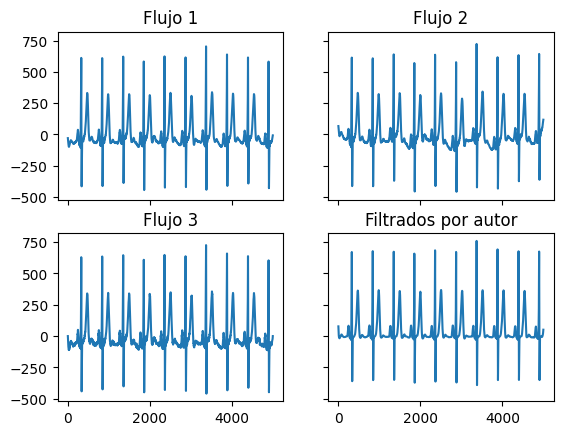

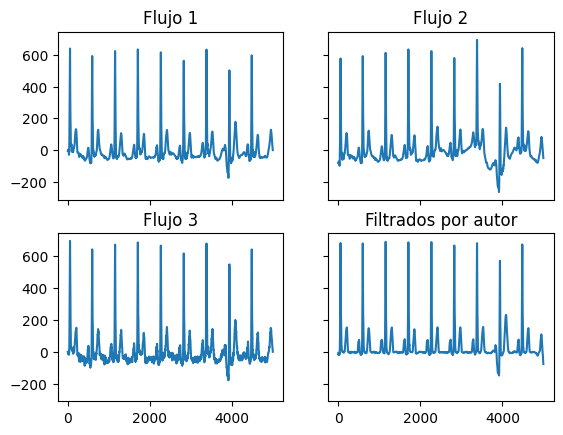

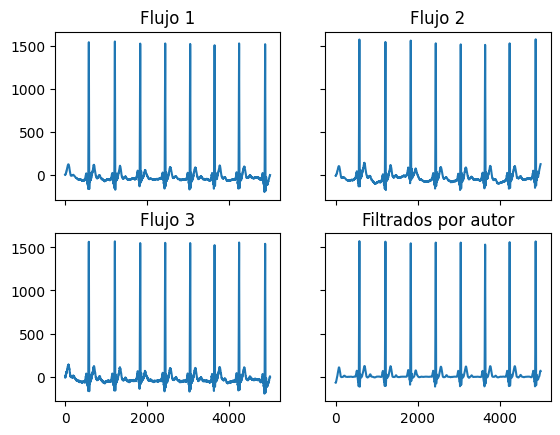

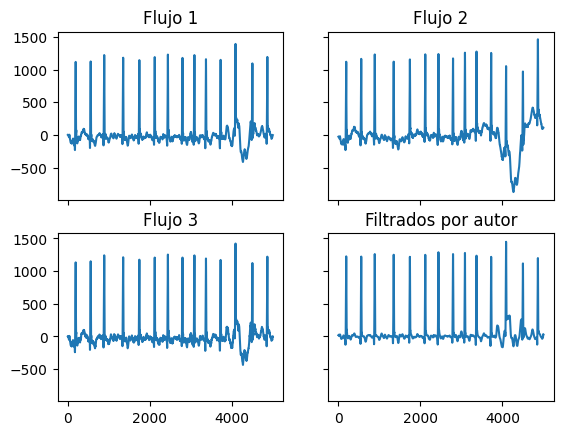

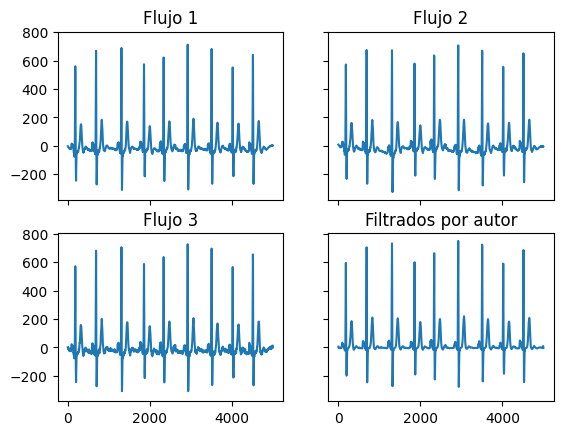

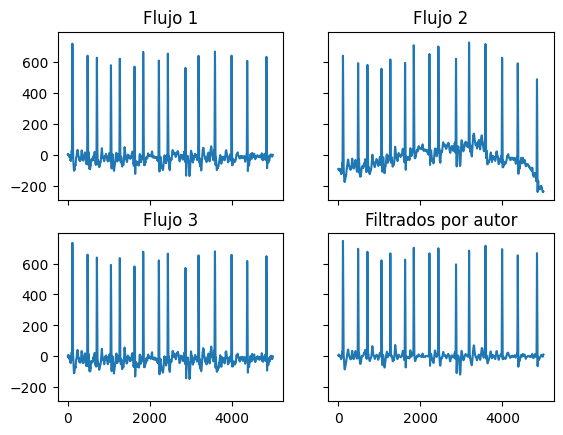

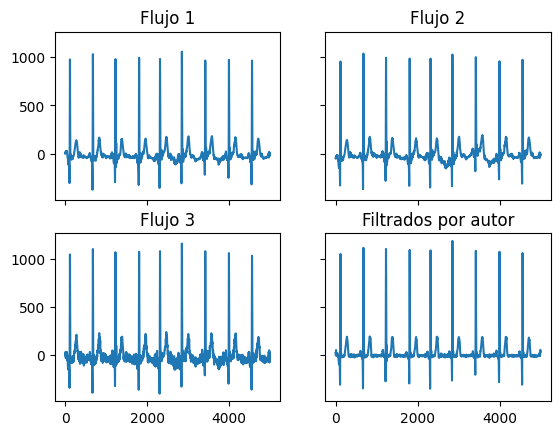

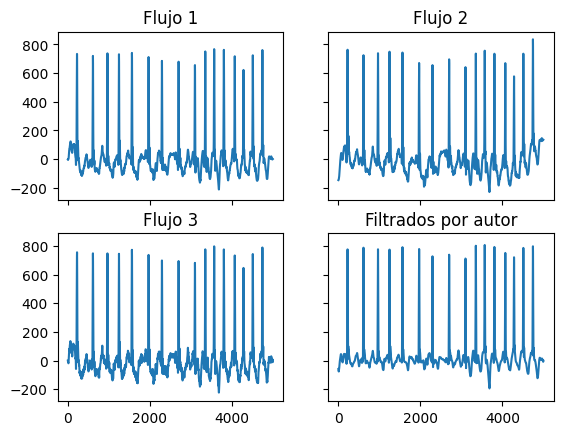

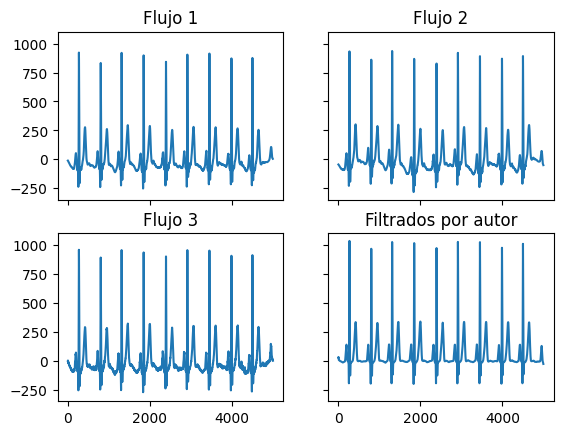

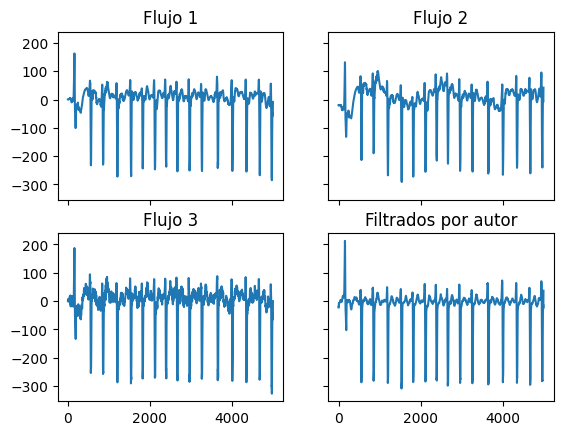

In [14]:
for i in range(10):
    fig, ax = plt.subplots(2,2, sharey = True, sharex = True)
    ax[0,0].plot(resultados_flujo_1[i])
    ax[0,0].set_title('Flujo 1')
    ax[0,1].plot(resultados_flujo_2[i])
    ax[0,1].set_title('Flujo 2')
    ax[1,0].plot(resultados_flujo_3[i])
    ax[1,0].set_title('Flujo 3')
    ax[1,1].plot(archivos_prefiltrados[i])
    ax[1,1].set_title('Filtrados por autor')


Es evidente que, aunque en algunos casos el Flujo 2 se asemeja bastante al Flujo 1 en cuanto a la forma de la se√±al ECG, presenta alteraciones significativas en ciertos registros, lo cual introduce distorsiones no deseadas que pueden afectar la interpretaci√≥n visual. Por otro lado, el Flujo 3 parece retener una cantidad considerable de ruido de alta frecuencia, lo que compromete su eficacia en la reducci√≥n de ruido.

Debido a estas observaciones, se ha decidido utilizar el Flujo 1 para el procesamiento de la totalidad de los archivos, ya que logra un equilibrio √≥ptimo al mantener la estructura esencial de la se√±al ECG y reducir eficazmente el ruido sin introducir alteraciones indeseadas.

In [15]:
fs = 500

archivos = [[file, pd.read_csv(os.path.join(directory,file))] for file in os.listdir(directory)]
resultados_filtrados = [[senal[0], flujo_1(senal[1].II, fs)] for senal in archivos]

5. Para cada se√±al extraer la frecuencia que contiene la m√°xima potencia usando Welch (15%)

Para este caso volvemos a definir la funci√≥n compress, ya que ser√° necesario al tener en cuenta que el resultado del proyecto 2 posee tanto compress como detrend entonces para evitar que estos afecten el resultado, se aplicar√°n tambien a los datos post-filtrado de este proyecto.

In [16]:
def compress(timeseries: np.ndarray) -> np.ndarray:
  """
    Normaliza la se√±al recibida, poniendola entre 0 y 1.
  """
  max = timeseries.max()
  min = timeseries.min()
  return (timeseries - min) / (max - min)

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patolog√≠a y el frecuencia de m√°xima potencia (fMP):

In [17]:
diagnostics_path = 'Diagnostics.xlsx'
diagnostics_df = pd.read_excel(diagnostics_path)

In [19]:
def extractNGraph(signal: np.ndarray, graph: bool = True) -> dict:
    FT = np.fft.fft(signal)
    FT = np.abs(FT[:len(FT)//2])
    freqs = np.fft.fftfreq(len(signal), 1/500)
    freqs = freqs[:len(freqs)//2]
    power = np.abs(FT)**2
    maxV = np.argmax(power)
    maxFf = round(freqs[maxV], 5)
    max = power[maxV]  
    maxF = FT[maxV]  
    if graph:   
        plt.figure()
        plt.plot(freqs, FT)
        plt.axvline(maxFf, color = 'r', linestyle = '--', label = 'Maxima Freq')
        plt.text(maxFf, maxF, f' {power[maxV]} es el valor m√°ximo de potencia')
    return {'MFrecuencia' : maxFf}

In [20]:
def FullDF(lista: list[list[str, pd.Series]]):
    a = 0
    dataframe = pd.DataFrame(columns=['patologia', 'MFrecuencia'])
    for csv in lista:
        row = diagnostics_df[diagnostics_df.FileName == csv[0].split('_derivacion_II')[0]]
        name = row.FileName.to_numpy()[0]
        patologia = row.Rhythm.to_numpy()[0]
        maximos = extractNGraph(csv[1], graph = False)
        total = {
            'patologia': patologia
        }
        total.update(maximos)
        dataframe.loc[name] = total
    return dataframe
new_df = FullDF(resultados_filtrados)

In [21]:
new_df.head()

patologia  MFrecuencia
MUSE_20180111_155154_74000      AFIB          9.7
MUSE_20180111_155203_15000      AFIB          2.7
MUSE_20180111_155758_17000        SB          3.7
MUSE_20180111_155839_67000        SB          1.0
MUSE_20180111_155859_36000        SB          0.9

7. Comparar los resultados de fMP del proyecto 3 con los del proyecto 2 usando estad√≠stica descriptiva: gr√°ficos y pruebas de hip√≥tesis (15%) Discuta si hay m√°s diferencias entre los tipos de se√±ales con el flujo de procesamiento propuesto respecto al que se trabaj√≥ en el proyecto 2.

In [22]:
old_df = pd.read_csv('../Proyecto_2/datos.csv').iloc[:, :2]
old_df.head()

patologia  MFrecuencia
0      AFIB          9.7
1      AFIB          2.7
2      AFIB          3.4
3        SB          3.7
4        SB          2.9

<Axes: title={'center': 'AFIB NEW'}, ylabel='Frequency'>

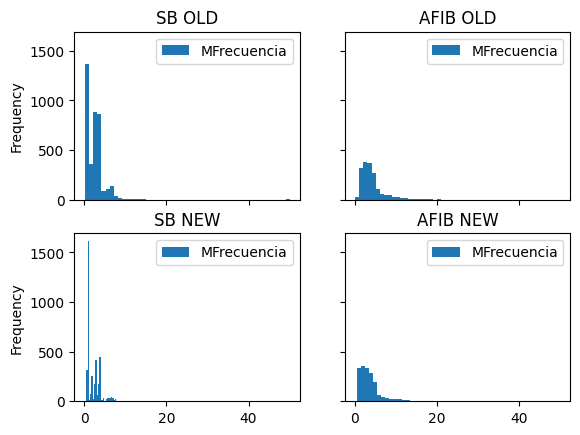

In [23]:
fig, axs = plt.subplots(2,2, sharey = True, sharex = True)
old_df[old_df.patologia == 'SB'].plot(kind='hist', ax=axs[0,0], title='SB OLD', bins = 50)
old_df[old_df.patologia == 'AFIB'].plot(kind='hist', ax=axs[0,1], title='AFIB OLD', bins = 50)
new_df[new_df.patologia == 'SB'].plot(kind='hist', ax=axs[1,0], title='SB NEW', bins = 50)
new_df[new_df.patologia == 'AFIB'].plot(kind='hist', ax=axs[1,1], title='AFIB NEW', bins = 50)


<Axes: title={'center': 'AFIB NEW'}>

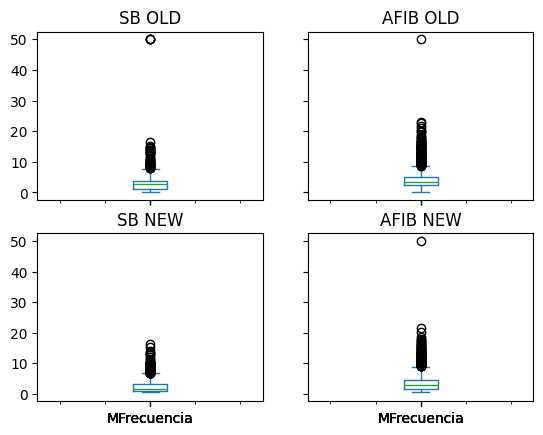

In [24]:
fig, axs = plt.subplots(2,2, sharey = True, sharex = True)
old_df[old_df.patologia == 'SB'].plot(kind='box', ax=axs[0,0], title='SB OLD')
old_df[old_df.patologia == 'AFIB'].plot(kind='box', ax=axs[0,1], title='AFIB OLD')
new_df[new_df.patologia == 'SB'].plot(kind='box', ax=axs[1,0], title='SB NEW')
new_df[new_df.patologia == 'AFIB'].plot(kind='box', ax=axs[1,1], title='AFIB NEW')

Podemos ver que, visualmente los AFIB parecen tener poca diferencia, al contrario de los pacientes SB, que presentan frecuencia m√°xima mas cercana al 0 con el procesamiento hecho por el autor respecto al procesamiento dado con el flujo 1. A√∫n asi para continuar comprobamos si estadisticamente existe dicha diferencia utilizando una prueba de hipotesis.

Es cierto que en su mayoria presentan un comportamiento similar, pero aun asi son notorias la existencia de diferencias.

Posteriormente, visualizando los diagramas de cajas y bigotes tenemos que:

SB OLD vs SB NEW:

* SB OLD: Las frecuencias m√°ximas est√°n m√°s dispersas, con algunos valores at√≠picos (outliers) presentes en la parte superior.

* SB NEW: Las frecuencias m√°ximas parecen estar m√°s concentradas cerca de cero, mostrando menos dispersi√≥n y menos valores at√≠picos. Esto sugiere que el nuevo procesamiento ha reducido la variabilidad en las frecuencias m√°ximas para los pacientes SB.

AFIB OLD vs AFIB NEW:

* AFIB OLD: Similar a SB OLD, muestra una mayor dispersi√≥n en las frecuencias m√°ximas y varios valores at√≠picos.

* AFIB NEW: Aunque tambi√©n muestra una mayor concentraci√≥n cerca de cero como SB NEW, la diferencia visual entre AFIB OLD y AFIB NEW no es tan pronunciada como en los gr√°ficos de SB. Esto indica que el nuevo procesamiento no ha afectado tanto a los datos de los pacientes con AFIB como a los de los pacientes con SB.

Para poder hacer esto necesitamos comprobar los supuestos, asumiendo independencia y probando con prueba de shapiro la normalidad y con prueba de levene si existe independencia de varianzas.

Utilizando la siguiente funci√≥n se comprobaran los supuestos y en caso de recibir un valor false se utilizar√°n pruebas U, en caso contrario pruebas T.

In [25]:
from scipy import stats

def pruebaT_U(data1: np.ndarray, data2: np.ndarray) -> bool:
    '''
    Prueba si un ndarray es cumple los requisitos para hacer una prueba T de student o 
    en caso contrario se requiere hacer una prueba U de Mann-Whitney
    
    Se retorna un True en caso de que se pueda hacer una prueba T y falso en caso contrario.
    '''
    _, pV_1 = stats.shapiro(data1)
    _, pV_2 = stats.shapiro(data2)
    if pV_1 < 0.05 or pV_2 < 0.05:
        return False
    
    _, pV_3 = stats.levene(data1, data2)

    if pV_3 < 0.05:
        return False

    return True

afibN = new_df[new_df.patologia == 'AFIB'].MFrecuencia
afibO = old_df[old_df.patologia == 'AFIB'].MFrecuencia
sbN = new_df[new_df.patologia == 'SB'].MFrecuencia
sbO = old_df[old_df.patologia == 'SB'].MFrecuencia
print('¬øSe puede usar prueba T con los resultados de AFIB?')
print(pruebaT_U(afibN, afibO))
print('¬øSe puede usar prueba T con los resultados de SB?')
print(pruebaT_U(sbN, sbO))

¬øSe puede usar prueba T con los resultados de AFIB?
False
¬øSe puede usar prueba T con los resultados de SB?
False


Se procede con las pruebas U para tanto los resultados de AFIB como de SB

In [26]:
estadistico, p_value = stats.mannwhitneyu(afibN, afibO)
print(p_value)
if p_value > 0.05:
    print(f'No hay diferencias significativas en los resultados de AFIB.')
else:
    print(f'Hay diferencias significativas en los resultados de AFIB.')


7.174783587938002e-15
Hay diferencias significativas en los resultados de AFIB.


In [27]:
estadistico, p_value = stats.mannwhitneyu(sbN, sbO)
print(p_value)
if p_value > 0.05:
    print(f'No hay diferencias significativas en los resultados de SB.')
else:
    print(f'Hay diferencias significativas en los resultados de SB.')

1.0878489324707887e-29
Hay diferencias significativas en los resultados de SB.


Es importante tener en cuenta que las se√±ales filtradas durante este proyecto no recibieron exactamente el mismo tratamiento que en el proyecto original. Esto es especialmente evidente en las diferencias significativas observadas entre esta se√±al y los procesos de otros flujos, en comparaci√≥n con el flujo 1. Sin embargo, esto no implica que el flujo 1 haya sido siempre completamente exacto; de hecho, hubo peque√±as variaciones que podr√≠an haber contribuido a la diferencia final observada.

Los par√°metros como la recuencia de corte y el orden del filtro FIR tienen un impacto directo en c√≥mo se modela y retiene la informaci√≥n de la se√±al ECG. En este proyecto, el filtro FIR pasa-altas de 0.5 Hz del Flujo 1 se eligi√≥ por su estabilidad y preservaci√≥n de la fase, lo cual permite mantener la forma de la se√±al sin grandes alteraciones. 

8. Hacer un informe con todos los puntos anteriores (15%)

## **Conclusiones**

Los resultados de este an√°lisis destacan la importancia de los m√©todos de filtrado en la precisi√≥n del an√°lisis de se√±ales ECG, especialmente para la caracterizaci√≥n de patolog√≠as espec√≠ficas como la bradicardia sinusal y la fibrilaci√≥n auricular. A partir de los hallazgos, se pueden concluir los siguientes puntos clave:

* Eficacia de los M√©todos de Filtrado: El m√©todo Robust LOESS y el m√©todo Non-Local Means (NLM) demostraron ser efectivos en la reducci√≥n de ruido en se√±ales ECG, cada uno enfocado en un tipo espec√≠fico de ruido. La combinaci√≥n de estos m√©todos permite conservar componentes esenciales en la se√±al mientras se elimina el ruido no deseado.

*  El Flujo 1 mostr√≥ mejor desempe√±o en la preservaci√≥n de la forma de la se√±al ECG, logrando una adecuada eliminaci√≥n de ruido sin alterar los componentes esenciales de la se√±al. Esto lo convierte en el flujo de procesamiento m√°s recomendado para an√°lisis ECG que requieren alta estabilidad y fidelidad en la se√±al filtrada.

*  La extracci√≥n de la fMP usando Welch fue efectiva en la identificaci√≥n de patrones caracter√≠sticos de SB y AFIB, proporcionando una herramienta √∫til para la discriminaci√≥n de estas patolog√≠as.

* La diferencia estad√≠sticamente significativa en las frecuencias de m√°xima potencia en el grupo SB entre este proyecto y el anterior sugiere que los m√©todos aplicados de filtraci√≥n de se√±ales afectan sustancialmente la forma y distribuci√≥n de frecuencias en esta patolog√≠a, subrayando la importancia de la consistencia en el procesamiento de se√±ales para estudios comparativos.




## **Bibliograf√≠a**


[1] Oh, H.-S., Nychka, D., Brown, T., & Charbonneau, P. (2004). Period analysis of variable stars by robust smoothing. Journal of the Royal Statistical Society. Series C, Applied Statistics, 53(1), 15‚Äì30. https://doi.org/10.1111/j.1467-9876.2004.00423.x

[2] Van De Ville, D., & Kocher, M. (2009). SURE-Based Non-Local Means. IEEE signal processing letters, 16(11), 973‚Äì976. https://doi.org/10.1109/lsp.2009.2027669

